In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [8]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv'

response = requests.get(url)

if response.status_code == 200:
    print(response.text[:1000])
    try:
        df = pd.read_csv(url)
        print(df)
    except pd.errors.ParserError as e:
        print("Parser error:", e)
else:
    print("Failed to fetch data from the URL")


1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1
11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1
12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1
13,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1
14,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1
15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1
16,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1
17,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,1
18,1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0.00,0.00,1
19,1.51911,13.90,3.

In [7]:
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [25]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
df.columns = names
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [27]:
df = df.drop('Id',1)

In [28]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [30]:
# All are numerical column.
# There are 213 rows and 10 columns.
# 9 columns are features and 1 column called Type is the target.

In [31]:
df.describe(include = 'all')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [32]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [33]:
# We don't see any missing values present in our dataset

In [34]:
df['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

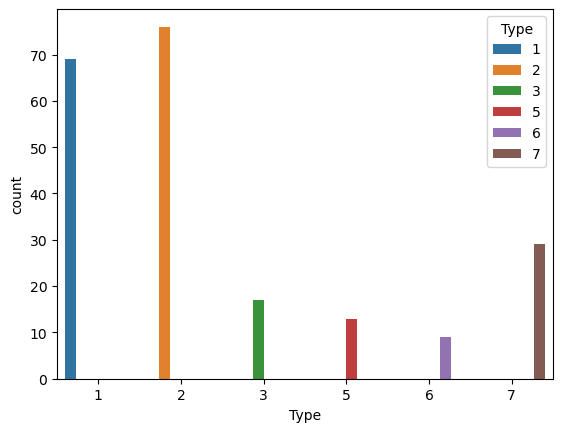

In [35]:
#  Data Visualization

sns.countplot(data = df, x = 'Type', hue = 'Type')

In [ ]:
# Here we can see the number of rows which belongs to a specific class.

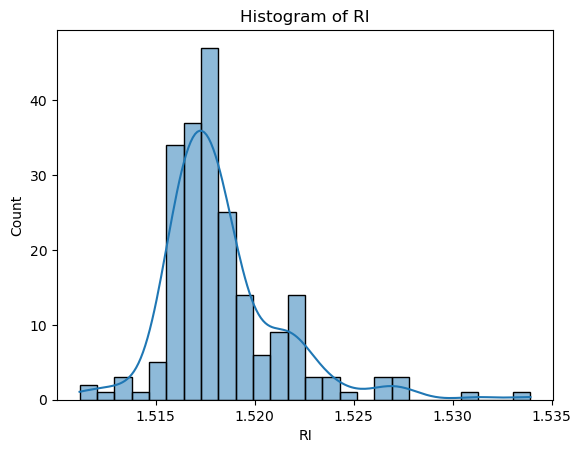

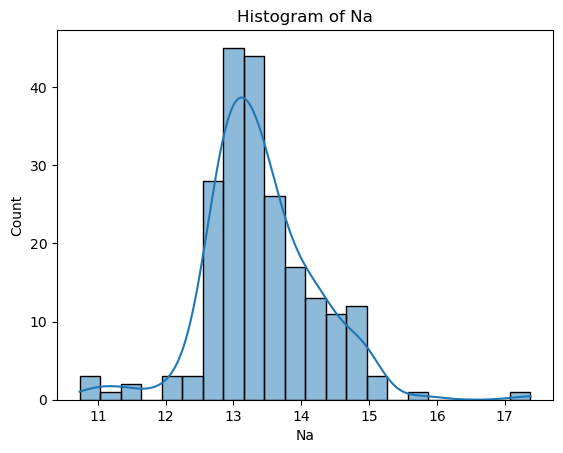

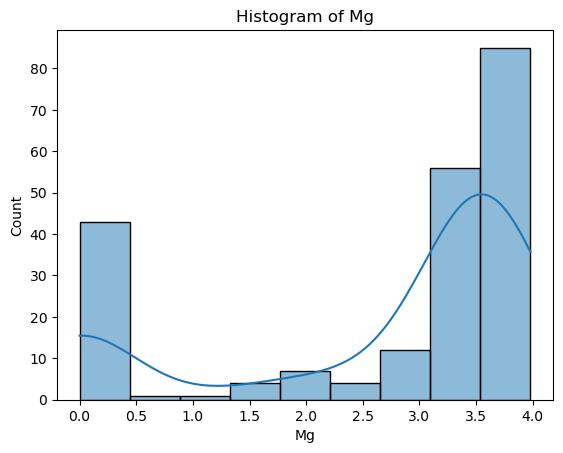

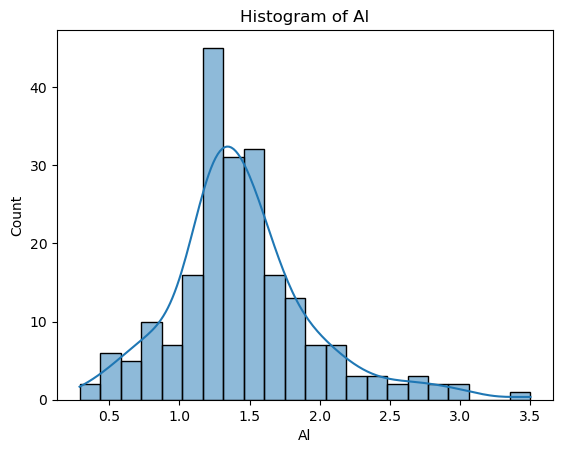

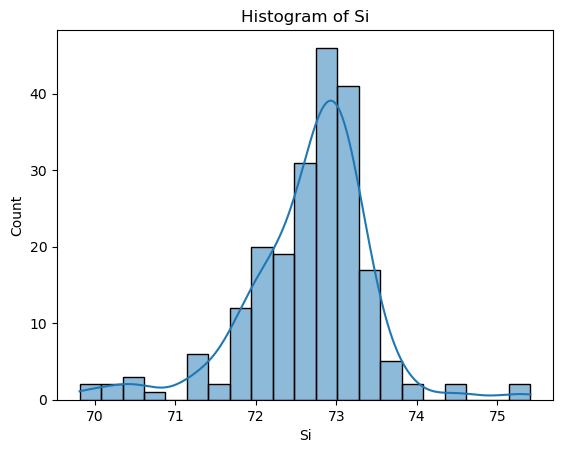

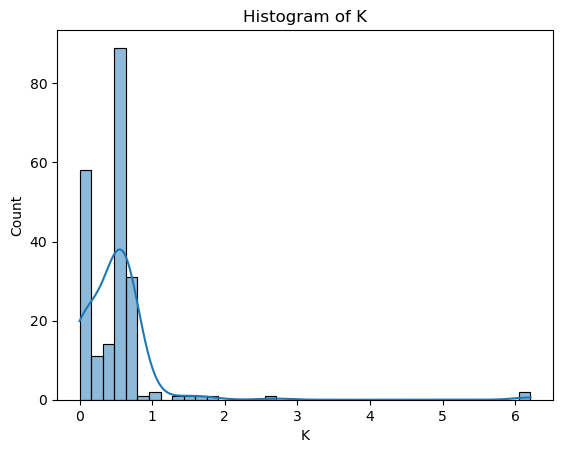

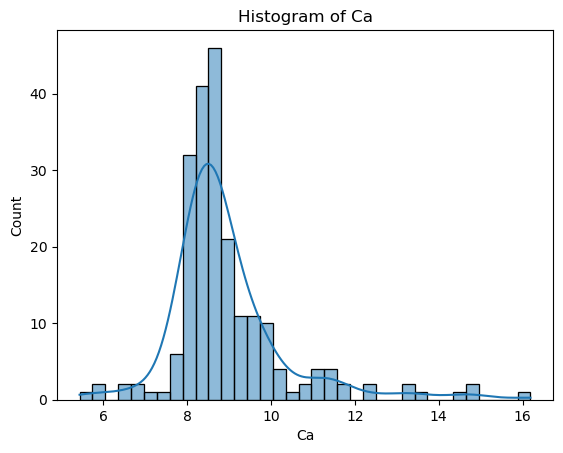

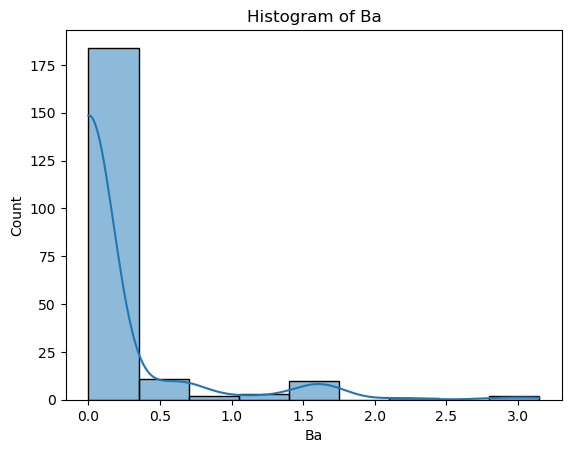

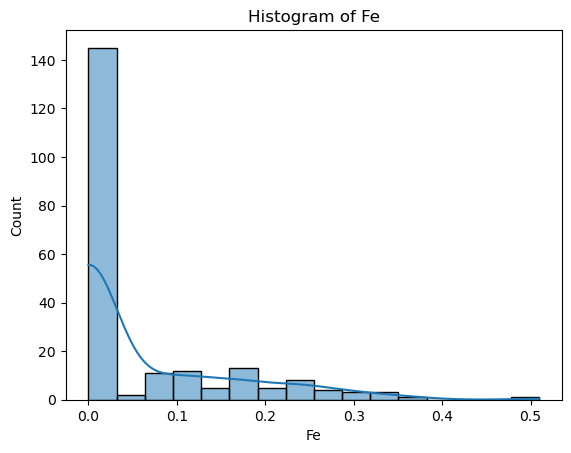

In [36]:
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
for i in cols:
    sns.histplot(data = df, x = i, kde = True)
    plt.title(f"Histogram of {i}")
    plt.show()

In [37]:
# Here we can see the distribution of the data columns.

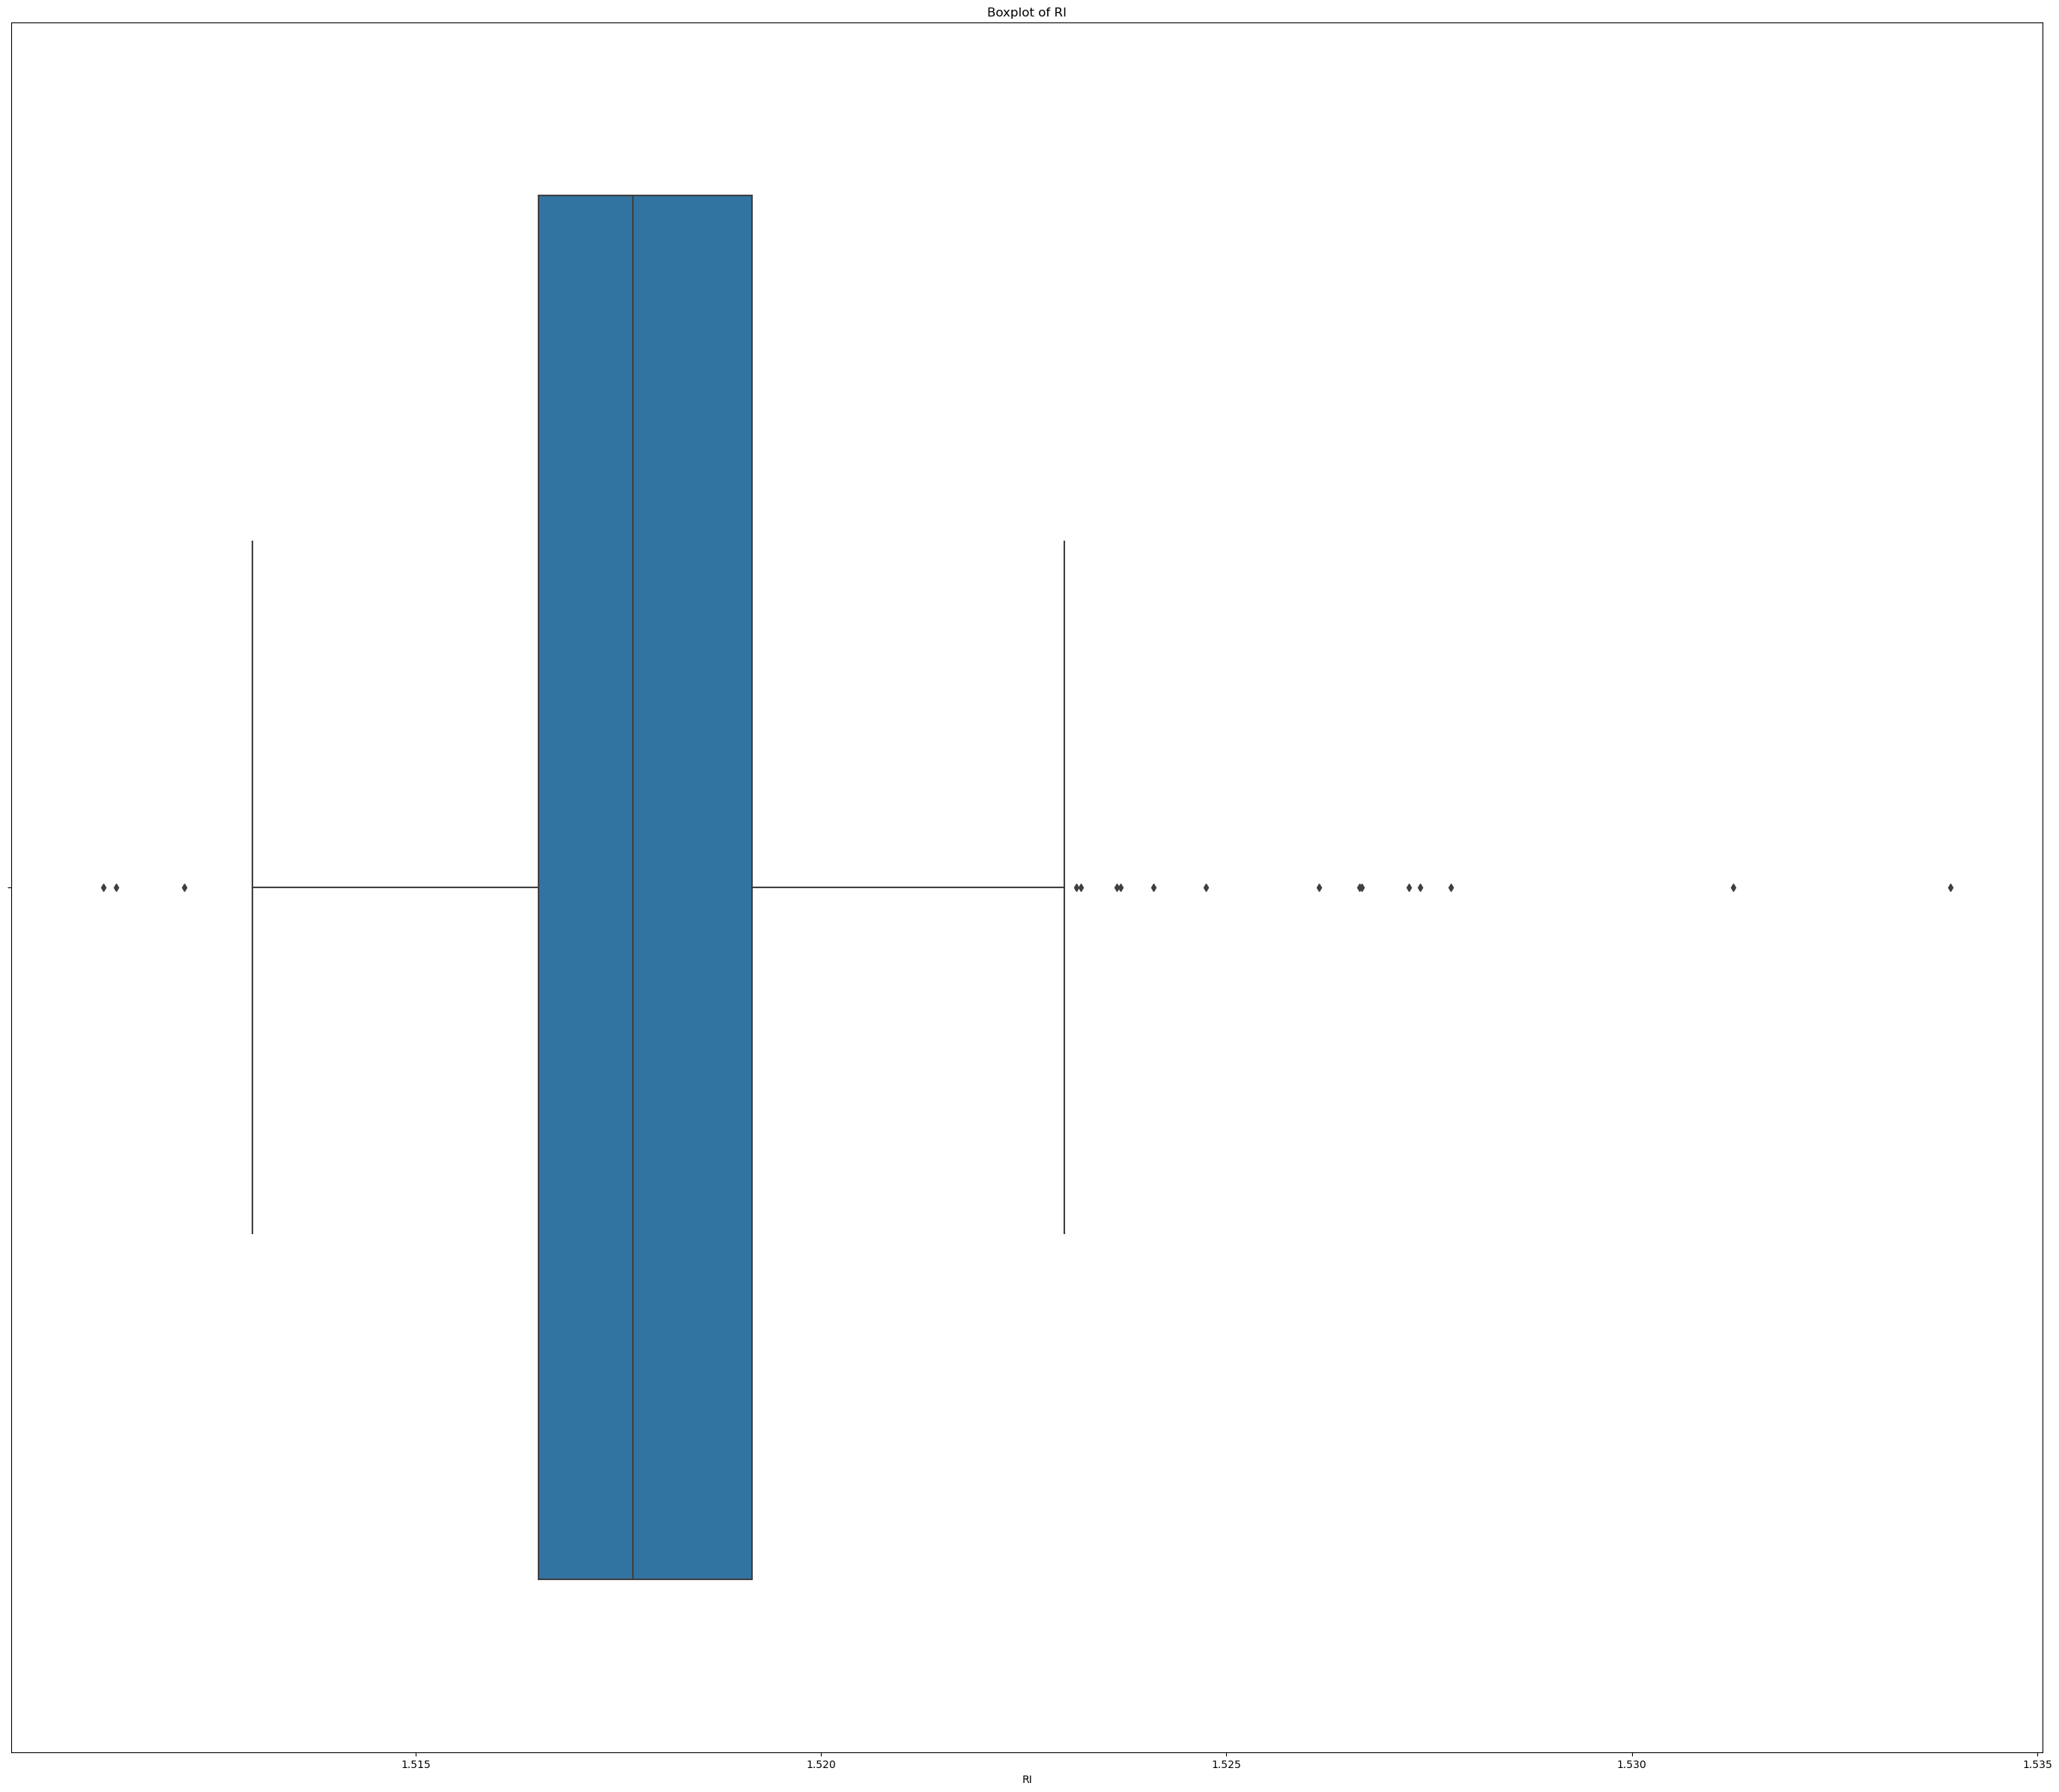

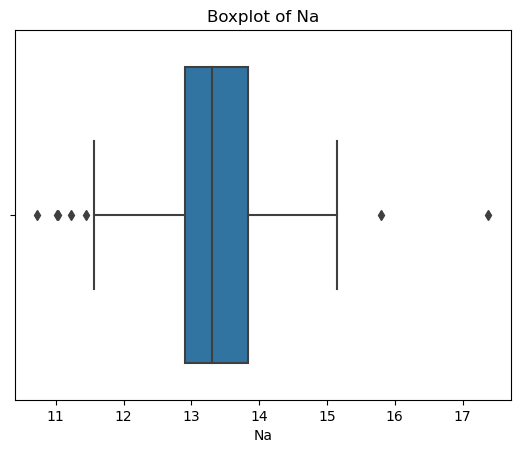

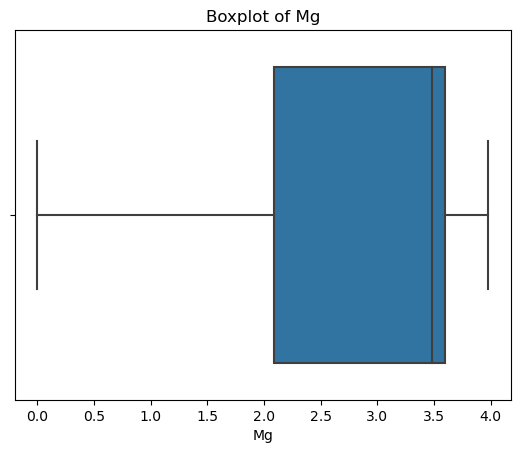

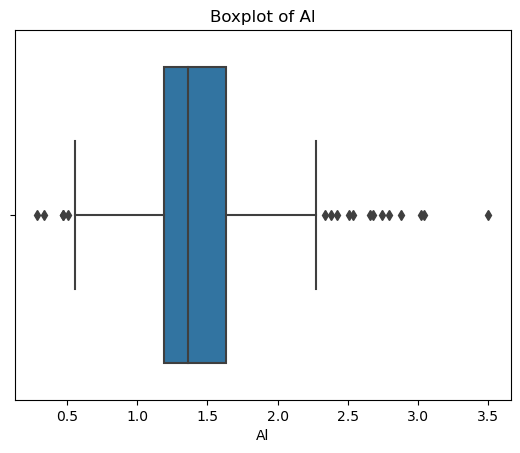

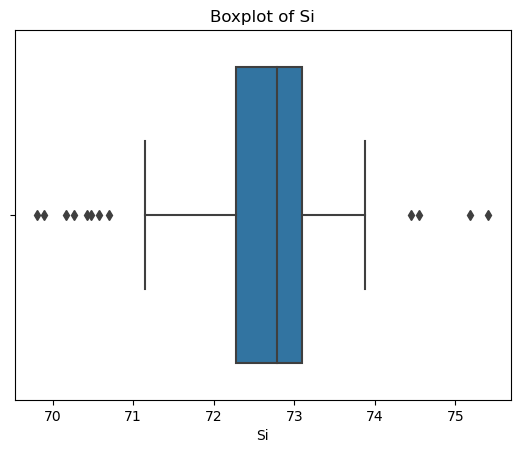

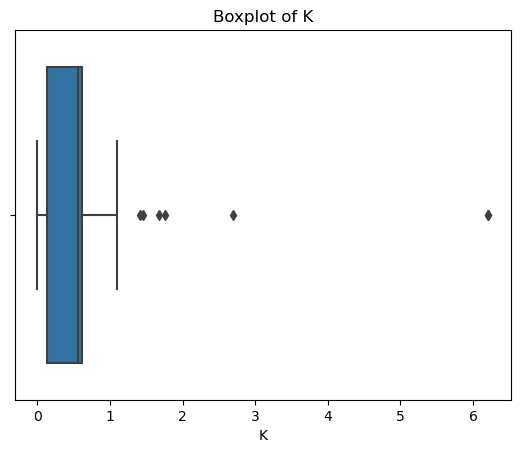

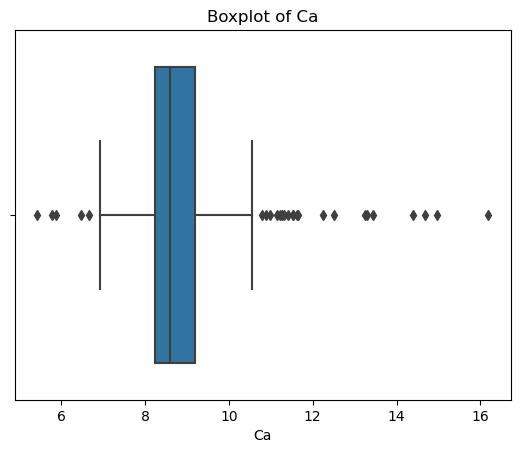

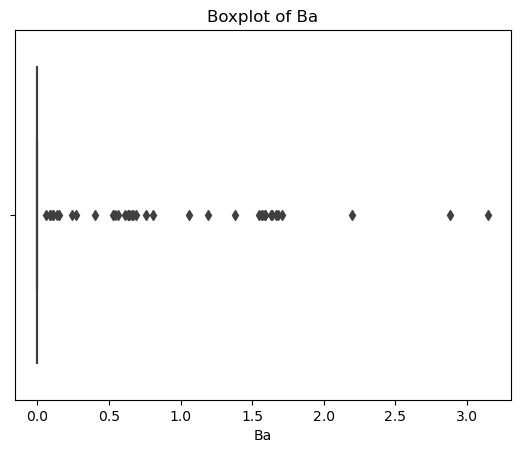

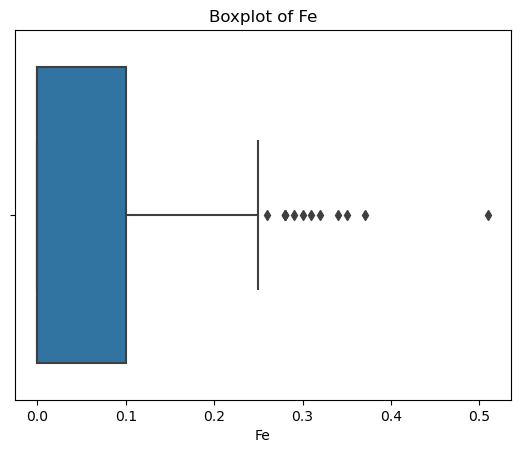

In [38]:
# Outlier Analysis
f, ax = plt.subplots(figsize = (35,30))
for i in cols:
    sns.boxplot(data = df, x = i)
    plt.title(f"Boxplot of {i}")
    plt.show()

In [39]:
# Here from this box plot we can see the outliers. The presence of the whiskers in by the two sides of the box plot dentoes the presence of outliers.

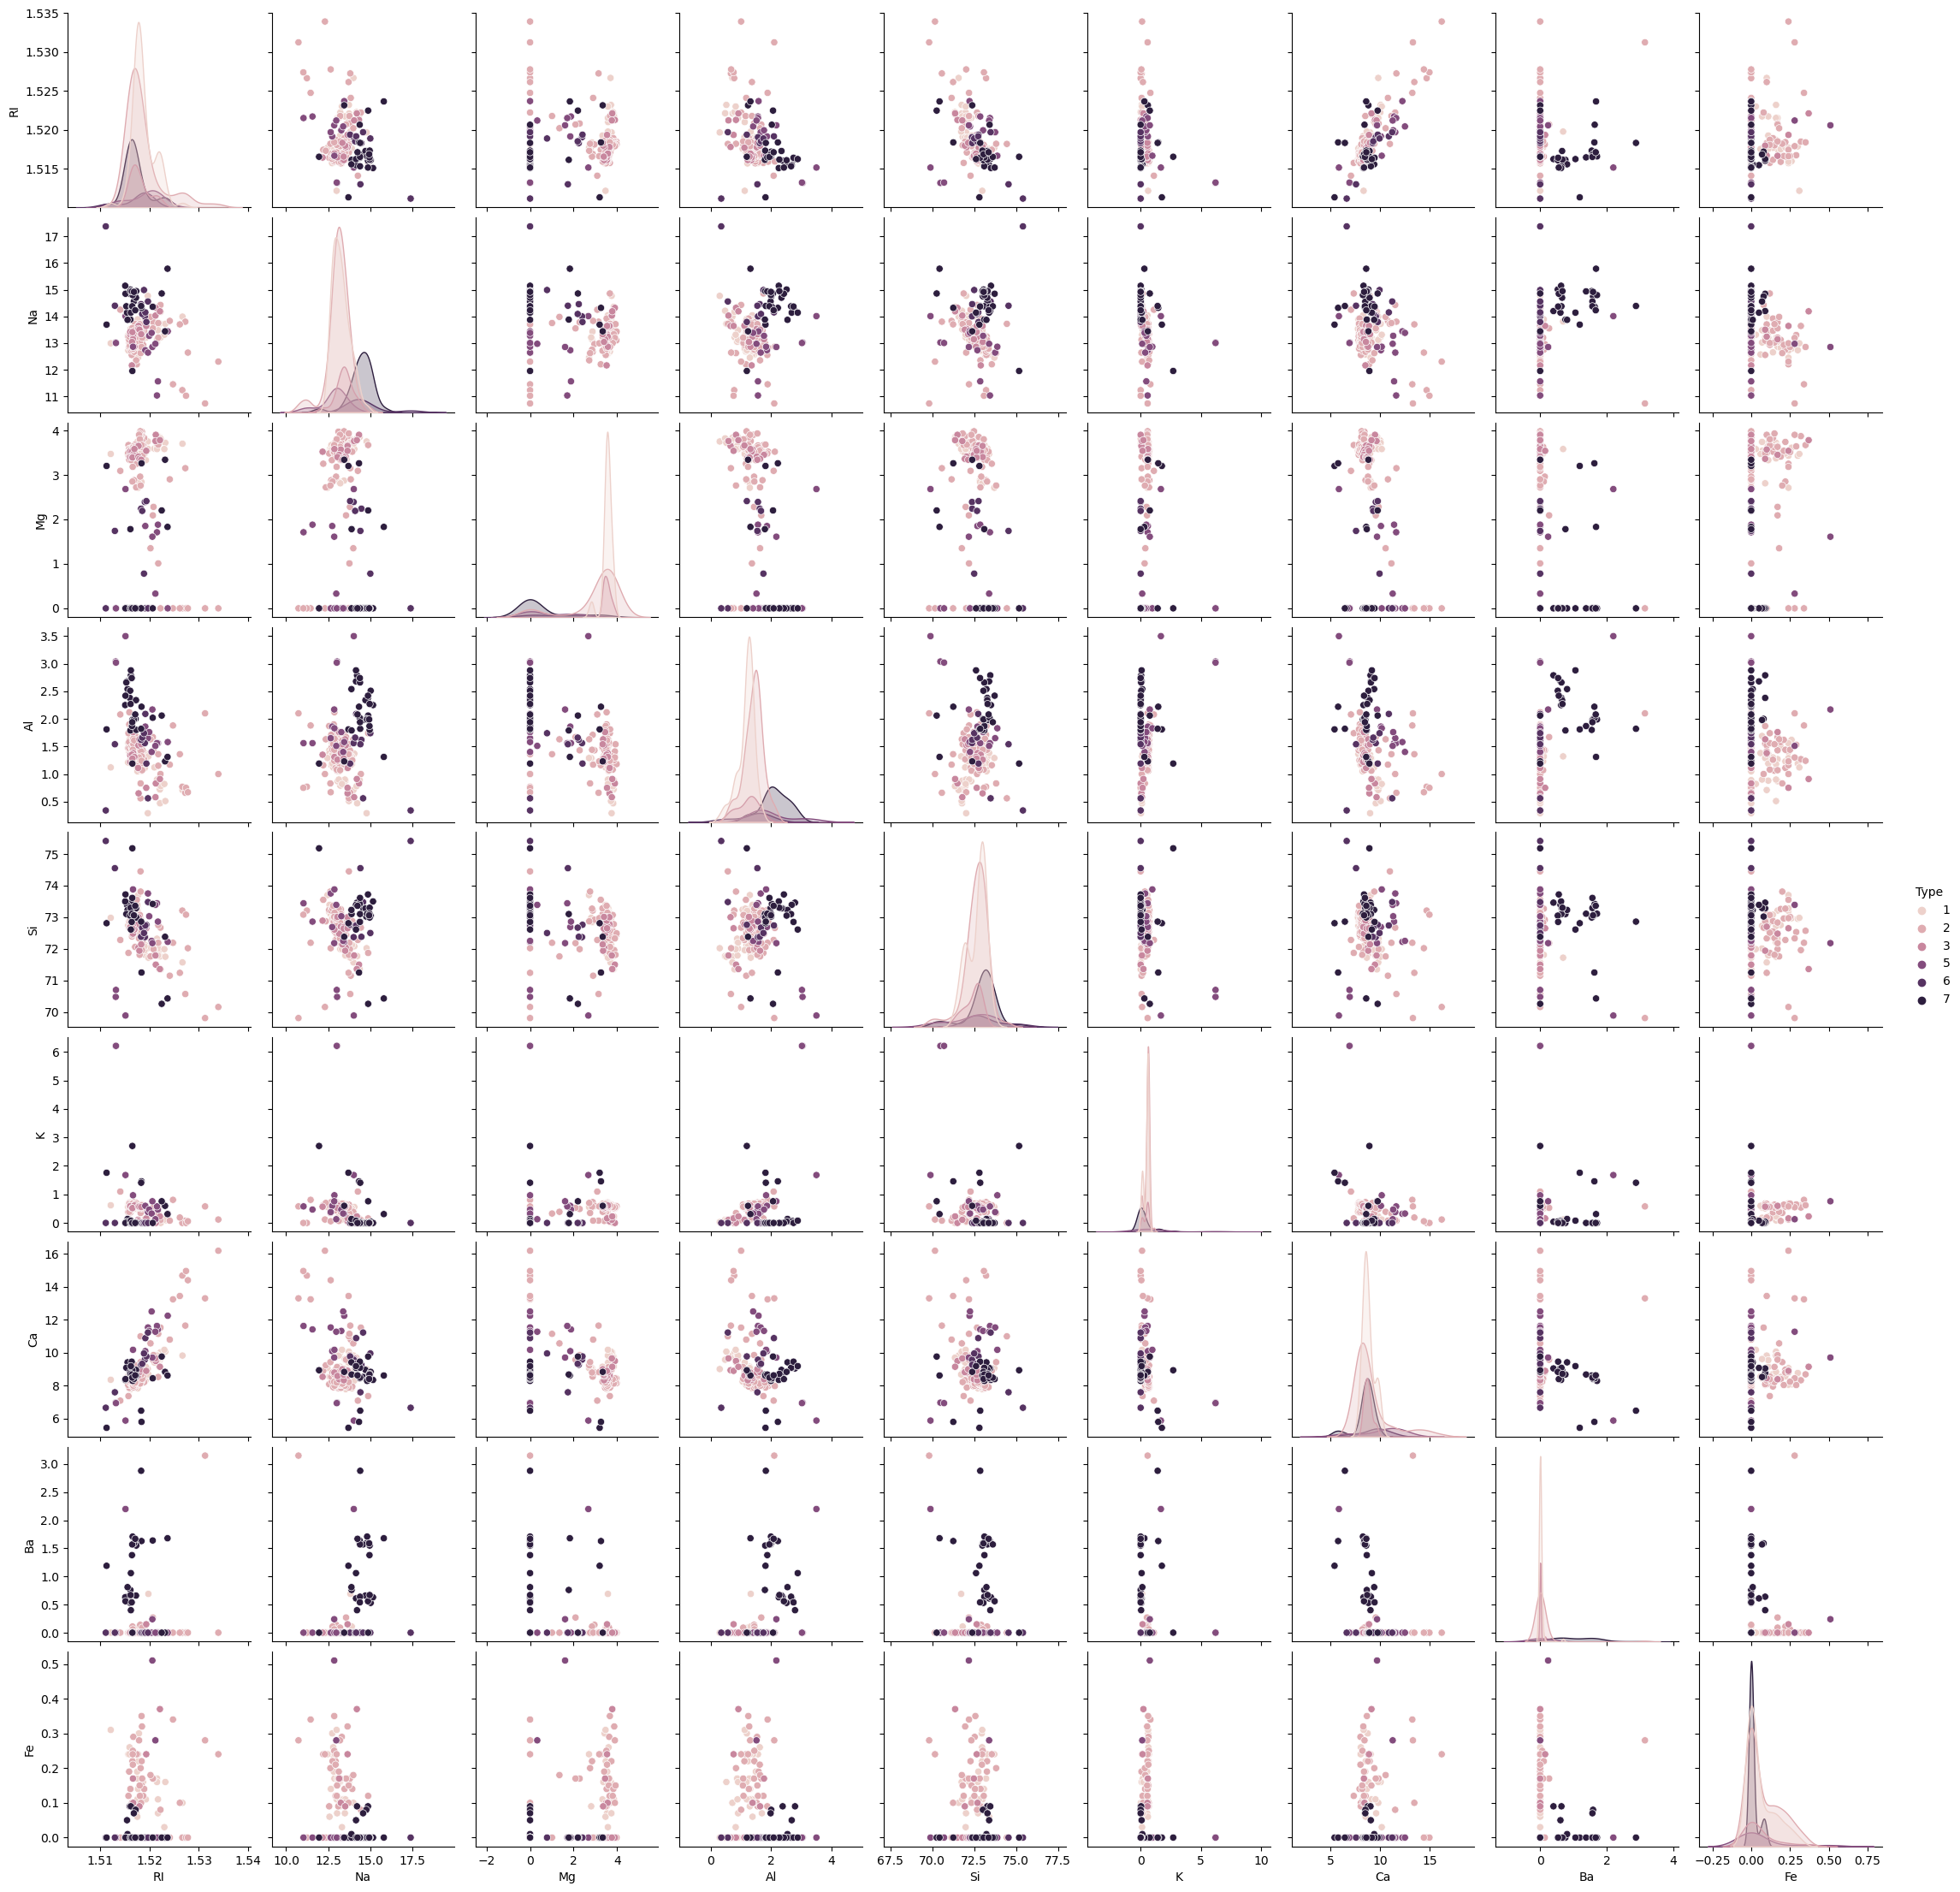

In [40]:
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
sns.pairplot(df[cols],hue = 'Type')

In [ ]:
# In the pairplot we can see that there is a relation existing between Ri and Ca.

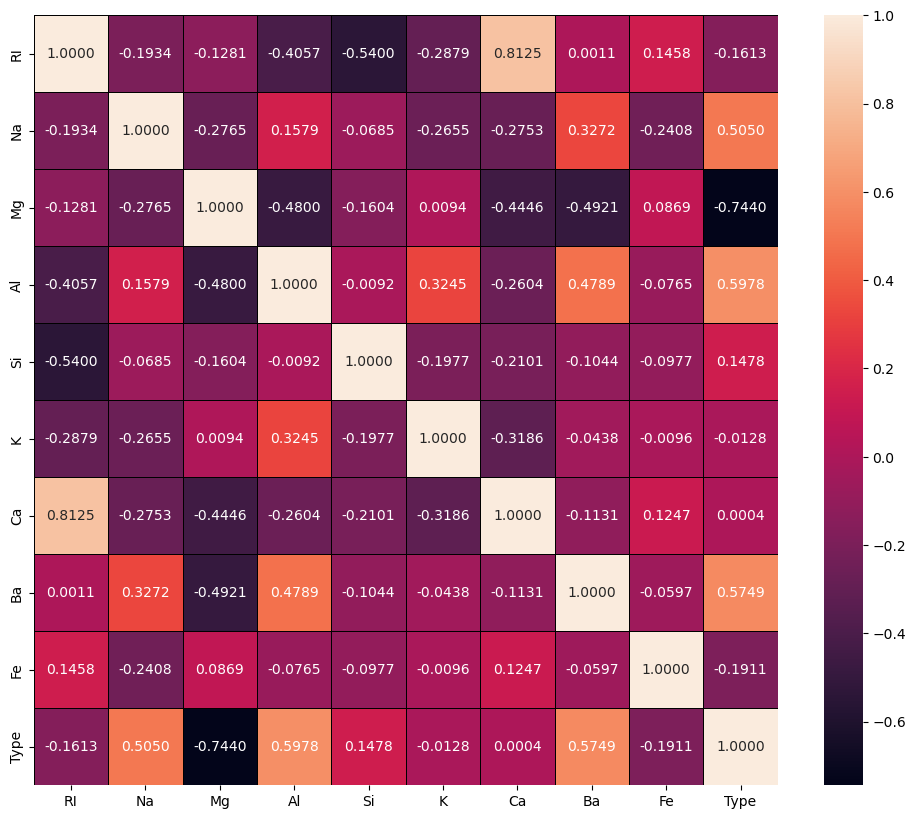

In [41]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df[cols].corr(), annot = True, linewidths = 0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

In [42]:
#  There is high correlation between Ca and RI hence, we can drop one of them.
#  When we look into the Type, Ca and K doesn't contribute to the Tyoe much since it's correlation is less or almost equal to zero.
#  Hence, in our model,we will be only considering feature columns except Ca and K.

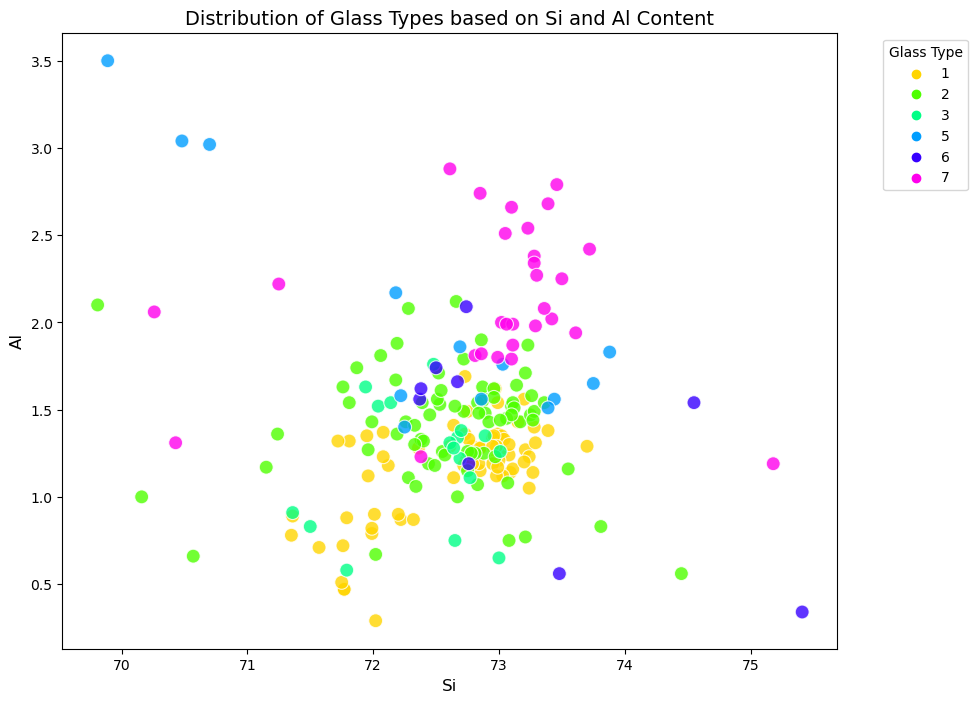

In [43]:
# Plotting the data using Seaborn for improved visualization
plt.figure(figsize=(10, 8))

palette = sns.color_palette("hsv", df['Type'].nunique())

sns.scatterplot(x='Si', y='Al', hue='Type', palette=palette, data=df, s=100, alpha=0.8)

plt.xlabel('Si', fontsize=12)
plt.ylabel('Al', fontsize=12)
plt.title('Distribution of Glass Types based on Si and Al Content', fontsize=14)
plt.legend(title='Glass Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [44]:
#  Data Preprocessing

X = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'Ba', 'Fe']]
y = df['Type']

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

In [47]:
#  Model Building without Normalization

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [48]:
knnModel = KNeighborsClassifier(n_neighbors = 7, metric='manhattan')
knnModel

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [49]:
# Fitting the data
knnModel.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [50]:
# Prediting the classes
pred = knnModel.predict(X_test)
pred

array([1, 7, 1, 7, 2, 5, 1, 2, 2, 1, 7, 5, 1, 2, 2, 5, 7, 2, 1, 2, 2, 7,
       7, 7, 1, 5, 1, 1, 2, 1, 1, 2, 2, 1, 1, 7, 5, 1, 2, 2, 1, 5, 1, 2,
       1, 5, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 7],
      dtype=int64)

In [51]:
acc = accuracy_score(y_test, pred)
acc

0.640625

In [52]:
#  Model Building using Normalized Data

X_train, X_test, y_train, y_test = train_test_split(Xn,y,test_size = 0.3, random_state = 42)

In [53]:
knnModel = KNeighborsClassifier(n_neighbors = 7, metric='manhattan')
knnModel

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [54]:
# Fitting the data
knnModel.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [55]:
# Prediting the classes
pred = knnModel.predict(X_test)
pred

array([2, 7, 1, 7, 2, 2, 1, 2, 2, 2, 5, 5, 1, 2, 6, 2, 7, 2, 1, 2, 1, 7,
       7, 7, 1, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 7, 5, 3, 2, 2, 1, 1, 1, 2,
       1, 5, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 7, 1, 1, 1, 1, 1, 1, 7],
      dtype=int64)

In [56]:
cm = confusion_matrix(y_test, pred)
cm

array([[16,  2,  0,  0,  0,  0],
       [ 5, 17,  0,  2,  0,  0],
       [ 2,  1,  1,  0,  0,  0],
       [ 1,  1,  0,  2,  0,  0],
       [ 1,  0,  0,  1,  1,  0],
       [ 1,  1,  0,  0,  0,  9]], dtype=int64)

In [57]:
ConfusionMatrix = pd.DataFrame(data = cm, index = ['Class 1', 'Class 2', 'Class 3', 'Class 5', 'Class 6', 'Class 7'], columns = ['Class 1', 'Class 2', 'Class 3','Class 5', 'Class 6', 'Class 7'])
ConfusionMatrix

,Class 1,Class 2,Class 3,Class 5,Class 6,Class 7
Class 1,16,2,0,0,0,0
Class 2,5,17,0,2,0,0
Class 3,2,1,1,0,0,0
Class 5,1,1,0,2,0,0
Class 6,1,0,0,1,1,0
Class 7,1,1,0,0,0,9


In [58]:
acc = accuracy_score(y_test, pred)
acc

0.71875

In [59]:
#  We got the classification Accuracy to be about 70.7% which is a reasonable efficency for our KNN model.

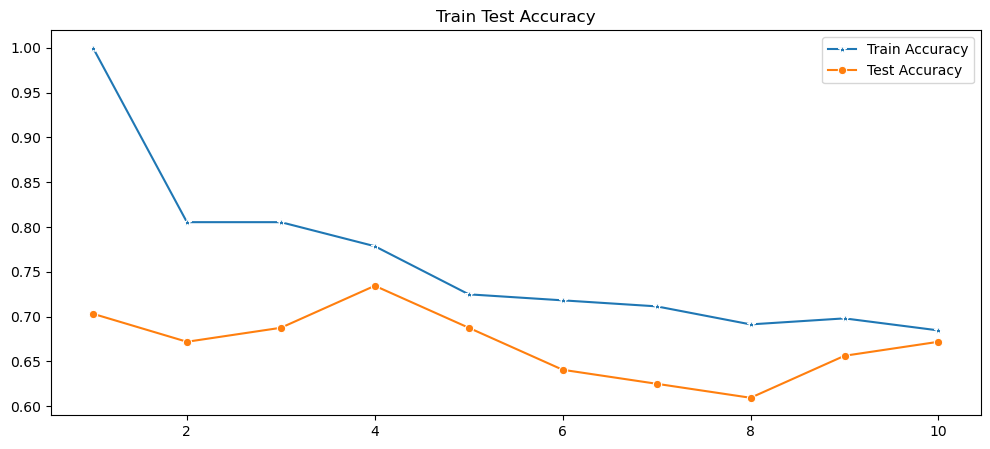

In [60]:
test_accuracy_list = []
train_accuracy_list = []

for i in range(1,11):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train, y_train)
    test_accuracy_list.append(knn2.score(X_test, y_test))
    train_accuracy_list.append(knn2.score(X_train, y_train))
    
plt.figure(figsize=(12,5))
p = sns.lineplot(x = range(1,11), y = train_accuracy_list,marker='*',label='Train Accuracy')
p = sns.lineplot(x = range(1,11), y = test_accuracy_list,marker='o',label='Test Accuracy')
plt.title("Train Test Accuracy");


In [61]:
# We can see the line graph showing the rest and train accuracy. We have 7 classes. Hence we stick to 7 neighbors with an accuracy of 71.8%.

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.62      0.89      0.73        18
           2       0.77      0.71      0.74        24
           3       1.00      0.25      0.40         4
           5       0.40      0.50      0.44         4
           6       1.00      0.33      0.50         3
           7       1.00      0.82      0.90        11

    accuracy                           0.72        64
   macro avg       0.80      0.58      0.62        64
weighted avg       0.77      0.72      0.71        64



In [63]:
k_values = list(range(1, 21))
accuracy_scores = []

# Evaluate accuracy for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit classifier on training data
    knn.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy score and store
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Find the best k value with highest accuracy
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

print(f'Best k value: {best_k}')
print(f'Highest accuracy: {best_accuracy:.4f}')

Best k value: 4
Highest accuracy: 0.7344


In [64]:
# here we can see a contradiction that the best accuracy is found for K = 4. As we can see in the above line graph also K = 7 donot have the best accuracy score. Since our data had 7 clusters we are going with 7.

In [ ]:
# We have implemented KNN in Glass Dataset and we have classified the data into 7 classes succesfully with an accuracy of 73.4%.
# This notebook also demonstrate the need for normalization in model building. Without normalization the accuracy was 64.1% and after normalizing the data we got an accuracy of 73.4%.